In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_palette("husl")

In [4]:
file_path = "data/raw/credit_risk_reto.csv" 
data = pd.read_csv(file_path)

In [5]:
print("Primeras filas del dataset:")
display(data.head())

Primeras filas del dataset:


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [6]:
print("\nInformación del dataset:")
data.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [7]:
print("\nDescripción estadística de las columnas numéricas:")
print(data.describe())


Descripción estadística de las columnas numéricas:
               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


In [8]:
print("\nCantidad de valores nulos por columna:")
print(data.isnull().sum())


Cantidad de valores nulos por columna:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


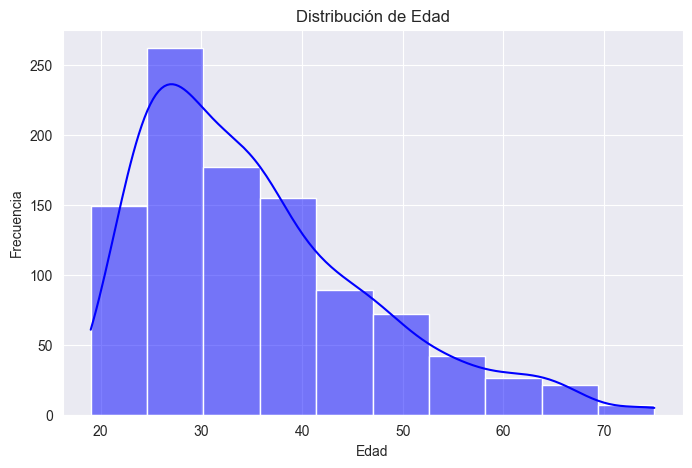

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=10, color='blue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

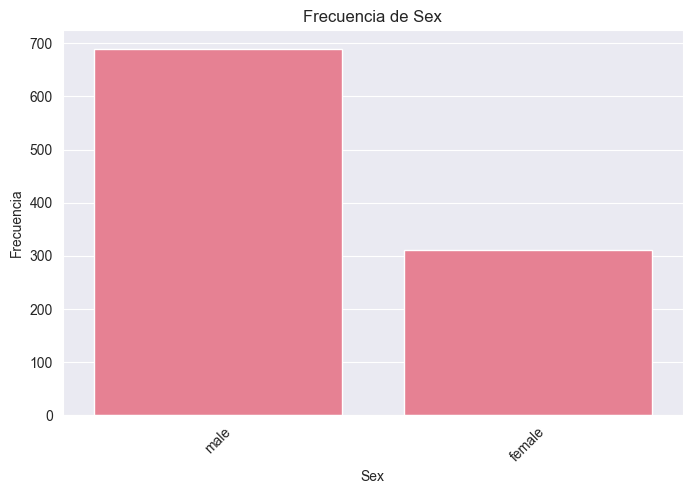

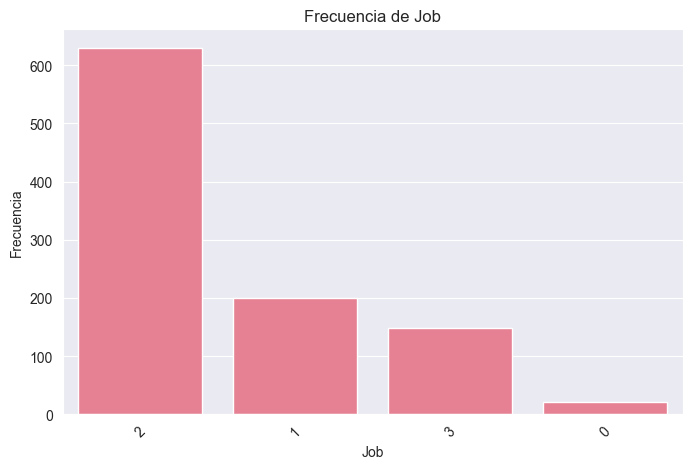

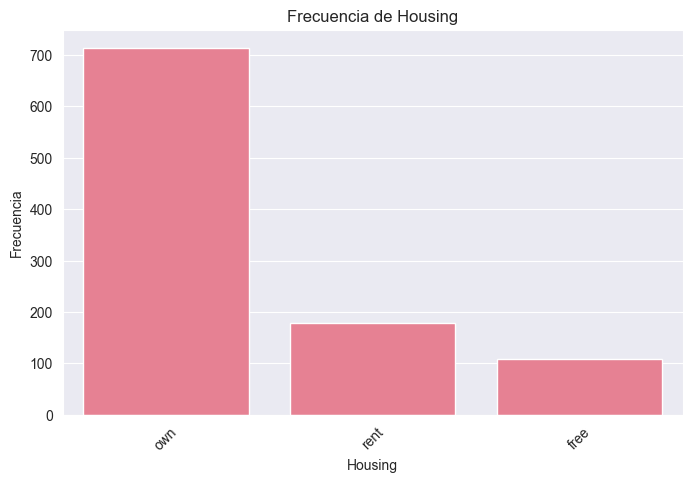

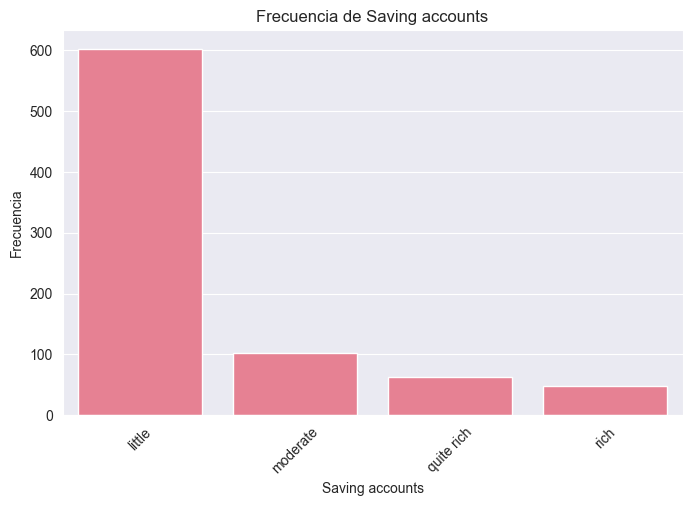

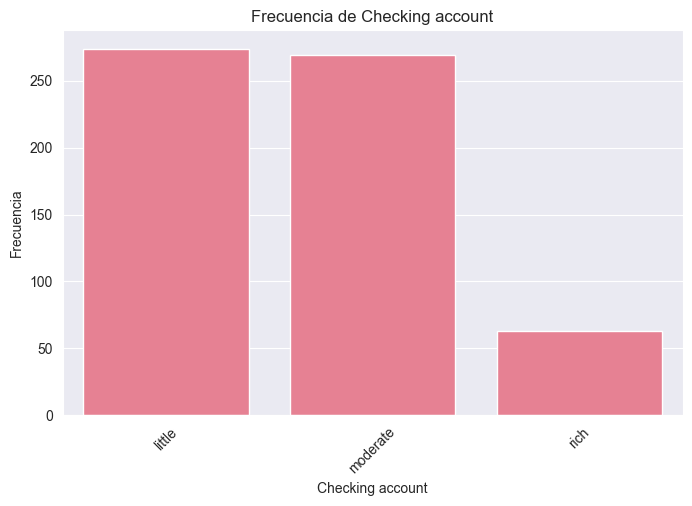

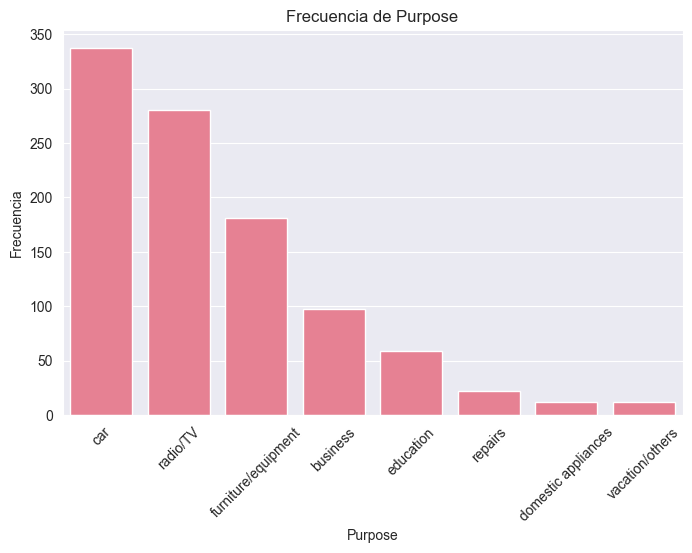

In [11]:
categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

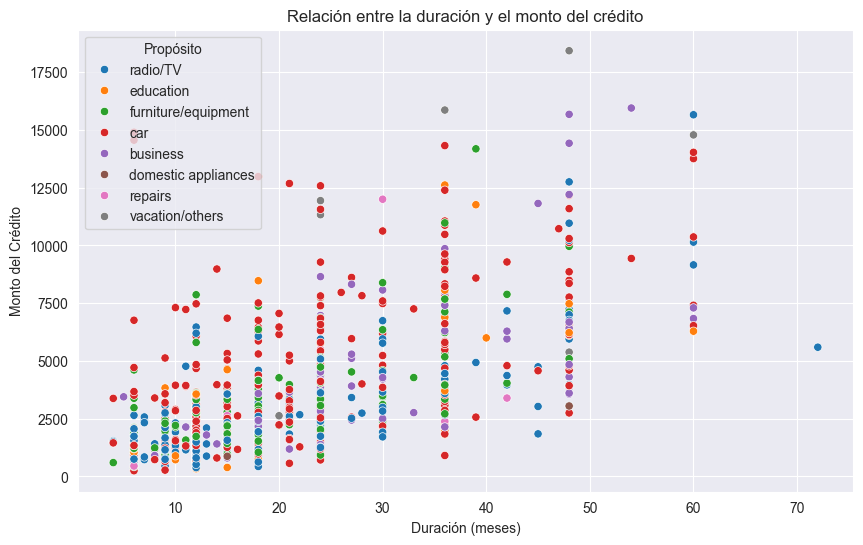

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Credit amount', hue='Purpose', data=data, palette='tab10')
plt.title('Relación entre la duración y el monto del crédito')
plt.xlabel('Duración (meses)')
plt.ylabel('Monto del Crédito')
plt.legend(title='Propósito')
plt.show()

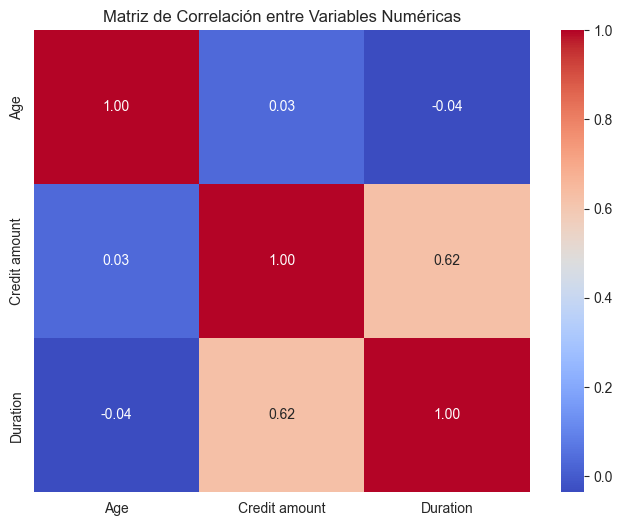

In [13]:
numerical_cols = ['Age', 'Credit amount', 'Duration']
corr_matrix = data[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()